<a href="https://colab.research.google.com/github/boradj/machine-learning/blob/main/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# computer vision


###Getting data

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unziping the file
zip = zipfile.ZipFile("pizza_steak.zip")
zip.extractall()
zip.close()

--2022-10-13 18:22:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.134.128, 74.125.141.128, 173.194.210.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.134.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   136MB/s    in 0.8s    

2022-10-13 18:22:19 (136 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### looking into data

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f" There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

 There are 2 directories and 0 images in 'pizza_steak'.
 There are 2 directories and 0 images in 'pizza_steak/test'.
 There are 0 directories and 250 images in 'pizza_steak/test/steak'.
 There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
 There are 2 directories and 0 images in 'pizza_steak/train'.
 There are 0 directories and 750 images in 'pizza_steak/train/steak'.
 There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [6]:
!ls -la pizza_steak # no extra

total 16
drwxr-xr-x 4 root root 4096 Oct 13 18:22 .
drwxr-xr-x 1 root root 4096 Oct 13 18:22 ..
drwxr-xr-x 4 root root 4096 Oct 13 18:22 test
drwxr-xr-x 4 root root 4096 Oct 13 18:22 train


In [7]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [8]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[0:]
print(class_names)

['pizza' 'steak']


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  img = mpimg.imread(target_folder
                     +"/" +random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")
  return img

['2216146.jpg']
Image shape: (384, 512, 3)


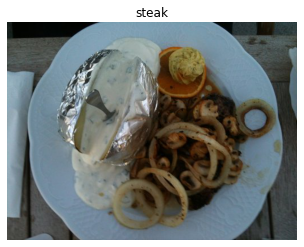

In [10]:
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "steak")

In [11]:
img

array([[[28, 37, 34],
        [23, 32, 29],
        [20, 29, 26],
        ...,
        [43, 61, 63],
        [45, 63, 65],
        [44, 62, 64]],

       [[22, 31, 28],
        [18, 27, 24],
        [17, 26, 23],
        ...,
        [45, 63, 65],
        [50, 68, 70],
        [51, 69, 71]],

       [[18, 27, 24],
        [15, 24, 21],
        [14, 23, 20],
        ...,
        [50, 68, 70],
        [49, 67, 69],
        [45, 63, 65]],

       ...,

       [[76, 77, 72],
        [76, 77, 72],
        [76, 77, 72],
        ...,
        [54, 64, 66],
        [57, 67, 69],
        [60, 70, 72]],

       [[73, 74, 69],
        [75, 76, 71],
        [76, 77, 72],
        ...,
        [51, 61, 63],
        [54, 64, 66],
        [57, 67, 69]],

       [[70, 71, 66],
        [73, 74, 69],
        [75, 76, 71],
        ...,
        [54, 64, 66],
        [57, 67, 69],
        [60, 70, 72]]], dtype=uint8)

In [12]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[28, 37, 34],
        [23, 32, 29],
        [20, 29, 26],
        ...,
        [43, 61, 63],
        [45, 63, 65],
        [44, 62, 64]],

       [[22, 31, 28],
        [18, 27, 24],
        [17, 26, 23],
        ...,
        [45, 63, 65],
        [50, 68, 70],
        [51, 69, 71]],

       [[18, 27, 24],
        [15, 24, 21],
        [14, 23, 20],
        ...,
        [50, 68, 70],
        [49, 67, 69],
        [45, 63, 65]],

       ...,

       [[76, 77, 72],
        [76, 77, 72],
        [76, 77, 72],
        ...,
        [54, 64, 66],
        [57, 67, 69],
        [60, 70, 72]],

       [[73, 74, 69],
        [75, 76, 71],
        [76, 77, 72],
        ...,
        [51, 61, 63],
        [54, 64, 66],
        [57, 67, 69]],

       [[70, 71, 66],
        [73, 74, 69],
        [75, 76, 71],
        ...,
        [54, 64, 66],
        [57, 67, 69],
        [60, 70, 72]]], dtype=uint8)>

In [13]:
img.shape

(384, 512, 3)

In [14]:
# transferring value in between 0 and 255 to use as input for neural network

In [15]:
#scaling
img/255

array([[[0.10980392, 0.14509804, 0.13333333],
        [0.09019608, 0.1254902 , 0.11372549],
        [0.07843137, 0.11372549, 0.10196078],
        ...,
        [0.16862745, 0.23921569, 0.24705882],
        [0.17647059, 0.24705882, 0.25490196],
        [0.17254902, 0.24313725, 0.25098039]],

       [[0.08627451, 0.12156863, 0.10980392],
        [0.07058824, 0.10588235, 0.09411765],
        [0.06666667, 0.10196078, 0.09019608],
        ...,
        [0.17647059, 0.24705882, 0.25490196],
        [0.19607843, 0.26666667, 0.2745098 ],
        [0.2       , 0.27058824, 0.27843137]],

       [[0.07058824, 0.10588235, 0.09411765],
        [0.05882353, 0.09411765, 0.08235294],
        [0.05490196, 0.09019608, 0.07843137],
        ...,
        [0.19607843, 0.26666667, 0.2745098 ],
        [0.19215686, 0.2627451 , 0.27058824],
        [0.17647059, 0.24705882, 0.25490196]],

       ...,

       [[0.29803922, 0.30196078, 0.28235294],
        [0.29803922, 0.30196078, 0.28235294],
        [0.29803922, 0

In [16]:
# cnn
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
# build model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters= 10,
                           kernel_size =3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
   tf.keras.layers.Conv2D(10, 3, activation="relu"),
   tf.keras.layers.MaxPool2D(pool_size=2,
                             padding= "valid"),
   tf.keras.layers.Conv2D(10, 3, activation="relu"),
   tf.keras.layers.Conv2D(10, 3, activation="relu"),
   tf.keras.layers.MaxPool2D(2),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps= len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 122s 3s/step - loss: 0.5465 - accuracy: 0.7267 - val_loss: 0.4045 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 120s 3s/step - loss: 0.4420 - accuracy: 0.8027 - val_loss: 0.3914 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 113s 2s/step - loss: 0.4098 - accuracy: 0.8227 - val_loss: 0.3556 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 125s 3s/step - loss: 0.3662 - accuracy: 0.8400 - val_loss: 0.3115 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 115s 2s/step - loss: 0.3291 - accuracy: 0.8600 - val_loss: 0.4072 - val_accuracy: 0.8160


[playground](https://colab.research.google.com/drive/1K7uQGHO58cDJ_8j1WlOtxJqVUgeUyFKE#scrollTo=h9te-d-7jne-)

In [17]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 267ms/step - loss: 0.9781 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 11s 234ms/step - loss: 0.6932 - accuracy: 0.4760 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 11s 235ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 11s 231ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 11s 233ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [18]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 312ms/step - loss: 3.8894 - accuracy: 0.6060 - val_loss: 1.1624 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 14s 298ms/step - loss: 0.9714 - accuracy: 0.7060 - val_loss: 0.7848 - val_accuracy: 0.6920
Epoch 3/5
47/47 [==============================] - 14s 299ms/step - loss: 0.8967 - accuracy: 0.7000 - val_loss: 0.9276 - val_accuracy: 0.6520
Epoch 4/5
47/47 [==============================] - 14s 298ms/step - loss: 0.5871 - accuracy: 0.7533 - val_loss: 0.6442 - val_accuracy: 0.7260
Epoch 5/5
47/47 [==============================] - 14s 297ms/step - loss: 0.4818 - accuracy: 0.7873 - val_loss: 0.4666 - val_accuracy: 0.7760


In [19]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


['3388717.jpg']
Image shape: (512, 512, 3)
['3660716.jpg']
Image shape: (512, 512, 3)


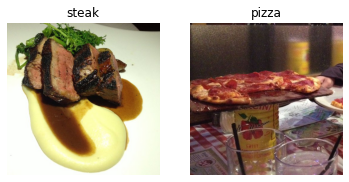

In [20]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [21]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [22]:
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [23]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [24]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [25]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [26]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [27]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [28]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [29]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [30]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [31]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 139s 3s/step - loss: 1.2526 - accuracy: 0.6640 - val_loss: 0.4533 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 138s 3s/step - loss: 0.4507 - accuracy: 0.8007 - val_loss: 0.3950 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 138s 3s/step - loss: 0.3415 - accuracy: 0.8647 - val_loss: 0.3903 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 128s 3s/step - loss: 0.2061 - accuracy: 0.9280 - val_loss: 0.3833 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 135s 3s/step - loss: 0.0794 - accuracy: 0.9820 - val_loss: 0.4901 - val_accuracy: 0.7980


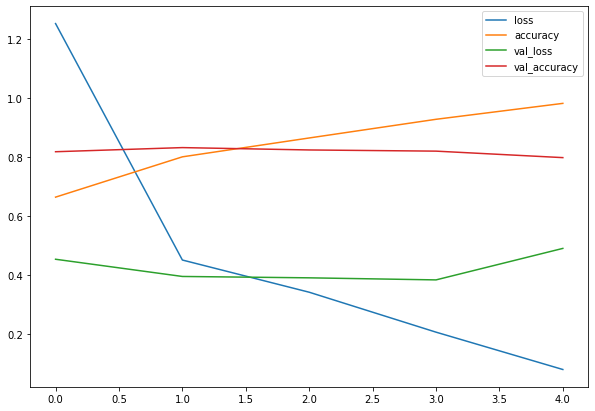

In [32]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [33]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

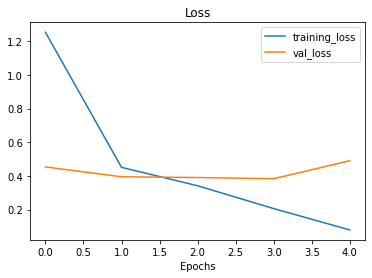

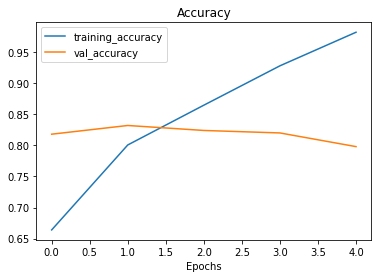

In [34]:
plot_loss_curves(history_4)

In [35]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [37]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [38]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 58s 1s/step - loss: 0.6208 - accuracy: 0.6513 - val_loss: 0.4959 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 56s 1s/step - loss: 0.4642 - accuracy: 0.7900 - val_loss: 0.4232 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 59s 1s/step - loss: 0.4242 - accuracy: 0.8027 - val_loss: 0.3526 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 58s 1s/step - loss: 0.4165 - accuracy: 0.8187 - val_loss: 0.3791 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 56s 1s/step - loss: 0.3750 - accuracy: 0.8420 - val_loss: 0.3459 - val_accuracy: 0.8520


In [39]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

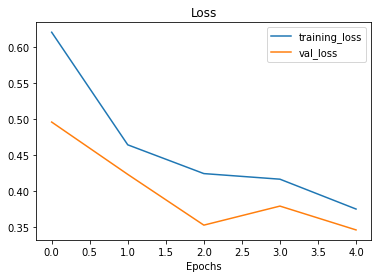

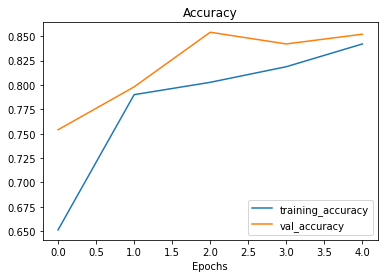

In [40]:
plot_loss_curves(history_5)

In [41]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [42]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [43]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

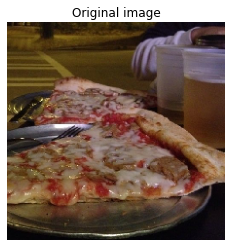

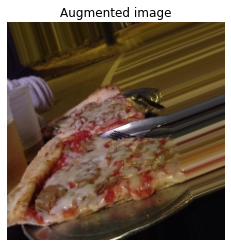

In [45]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [46]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 73s 2s/step - loss: 0.7024 - accuracy: 0.4560 - val_loss: 0.6793 - val_accuracy: 0.6620
Epoch 2/5
47/47 [==============================] - 69s 1s/step - loss: 0.6865 - accuracy: 0.5793 - val_loss: 0.6491 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 70s 1s/step - loss: 0.6648 - accuracy: 0.6200 - val_loss: 0.5625 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 71s 2s/step - loss: 0.6591 - accuracy: 0.5700 - val_loss: 0.5678 - val_accuracy: 0.6720
Epoch 5/5
47/47 [==============================] - 69s 1s/step - loss: 0.5975 - accuracy: 0.7073 - val_loss: 0.5153 - val_accuracy: 0.7480


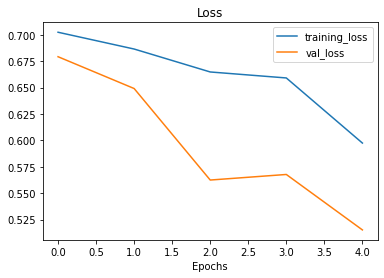

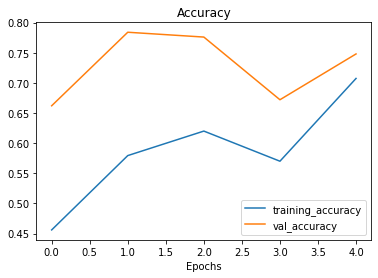

In [47]:
plot_loss_curves(history_6)

In [49]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)
                                        

Found 1500 images belonging to 2 classes.


In [50]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 72s 2s/step - loss: 0.6522 - accuracy: 0.6020 - val_loss: 0.5795 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 71s 2s/step - loss: 0.5786 - accuracy: 0.7040 - val_loss: 0.6483 - val_accuracy: 0.6020
Epoch 3/5
47/47 [==============================] - 69s 1s/step - loss: 0.5322 - accuracy: 0.7347 - val_loss: 0.3954 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 69s 1s/step - loss: 0.4707 - accuracy: 0.7753 - val_loss: 0.3672 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 71s 2s/step - loss: 0.4703 - accuracy: 0.7673 - val_loss: 0.3381 - val_accuracy: 0.8700


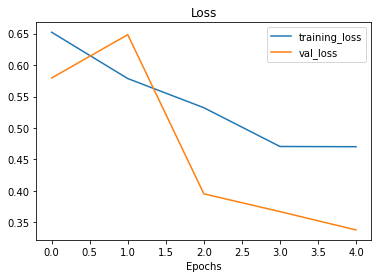

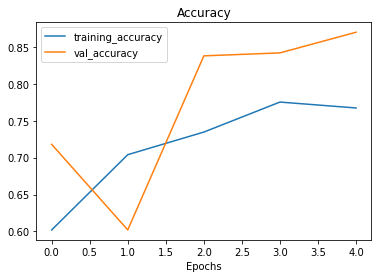

In [51]:
plot_loss_curves(history_7)

In [52]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 129s 3s/step - loss: 0.6401 - accuracy: 0.6367 - val_loss: 0.5026 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 126s 3s/step - loss: 0.5596 - accuracy: 0.7160 - val_loss: 0.4284 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 128s 3s/step - loss: 0.5283 - accuracy: 0.7447 - val_loss: 0.4101 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 128s 3s/step - loss: 0.5119 - accuracy: 0.7553 - val_loss: 0.3799 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 128s 3s/step - loss: 0.5170 - accuracy: 0.7460 - val_loss: 0.3735 - val_accuracy: 0.8380


In [53]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [54]:
# Check model_8 architecture (same as model_1)
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

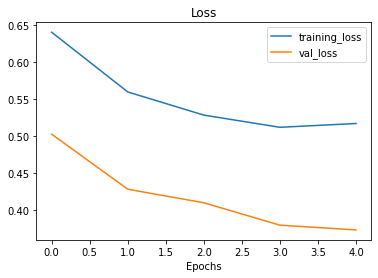

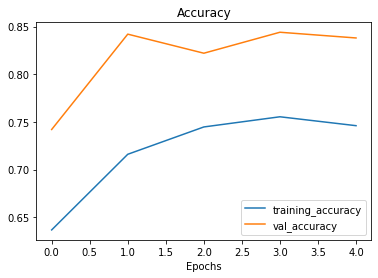

In [55]:
plot_loss_curves(history_8)

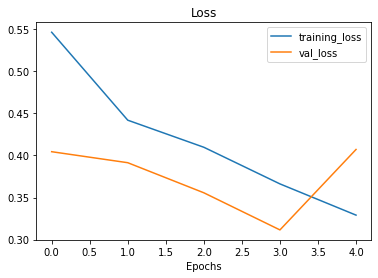

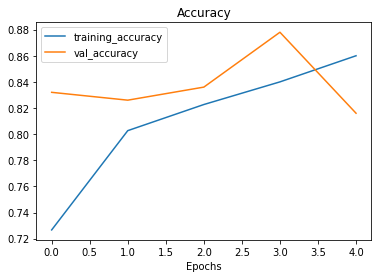

In [56]:
plot_loss_curves(history_1)

In [57]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2022-10-13 19:23:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-10-13 19:23:29 (32.6 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



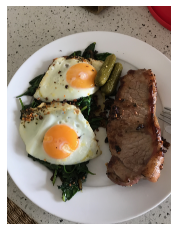

In [58]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [59]:
steak.shape

(4032, 3024, 3)

In [60]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [61]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [63]:
model_8.predict(steak)

ValueError: ignored

In [64]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [65]:
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 110ms/step


array([[0.7651934]], dtype=float32)

In [66]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [67]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [68]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 37ms/step


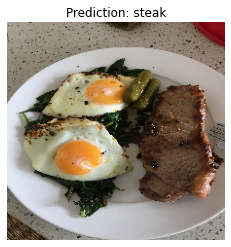

In [69]:
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2022-10-13 19:28:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2022-10-13 19:28:05 (41.5 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 40ms/step


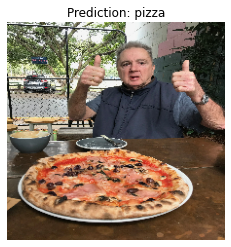

In [70]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

In [71]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-10-13 19:28:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 173.194.210.128, 173.194.211.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   150MB/s    in 3.3s    

2022-10-13 19:28:20 (150 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [72]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 

In [73]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [74]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1274942.jpg']
Image shape: (512, 512, 3)


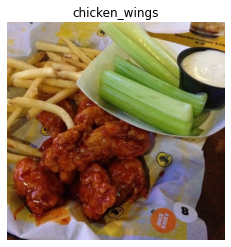

In [75]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

In [76]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [78]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 578s 2s/step - loss: 2.3100 - accuracy: 0.1113 - val_loss: 2.2609 - val_accuracy: 0.1452
Epoch 2/5
235/235 [==============================] - 564s 2s/step - loss: 2.1527 - accuracy: 0.2233 - val_loss: 2.1221 - val_accuracy: 0.2324
Epoch 3/5
235/235 [==============================] - 563s 2s/step - loss: 1.6272 - accuracy: 0.4437 - val_loss: 2.0818 - val_accuracy: 0.2696
Epoch 4/5
235/235 [==============================] - 563s 2s/step - loss: 0.9732 - accuracy: 0.6753 - val_loss: 2.7203 - val_accuracy: 0.2628
Epoch 5/5
235/235 [==============================] - 565s 2s/step - loss: 0.3909 - accuracy: 0.8771 - val_loss: 3.9386 - val_accuracy: 0.2420


In [79]:
model_9.evaluate(test_data)

79/79 [==============================] - 60s 745ms/step - loss: 3.9386 - accuracy: 0.2420


[3.9386003017425537, 0.24199999868869781]

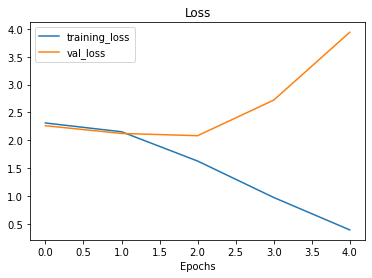

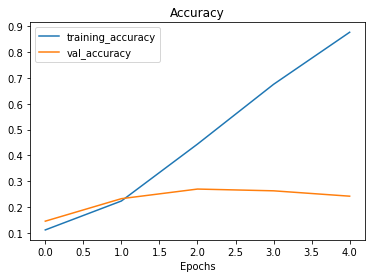

In [80]:
plot_loss_curves(history_9)

In [82]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 261s 1s/step - loss: 2.1806 - accuracy: 0.2399 - val_loss: 2.0066 - val_accuracy: 0.2880
Epoch 2/5
235/235 [==============================] - 258s 1s/step - loss: 1.8340 - accuracy: 0.3679 - val_loss: 1.9803 - val_accuracy: 0.3012
Epoch 3/5
235/235 [==============================] - 264s 1s/step - loss: 1.5206 - accuracy: 0.4959 - val_loss: 1.9563 - val_accuracy: 0.3216
Epoch 4/5
235/235 [==============================] - 264s 1s/step - loss: 1.0174 - accuracy: 0.6799 - val_loss: 2.1612 - val_accuracy: 0.3164
Epoch 5/5
235/235 [==============================] - 262s 1s/step - loss: 0.5728 - accuracy: 0.8343 - val_loss: 2.6085 - val_accuracy: 0.2840


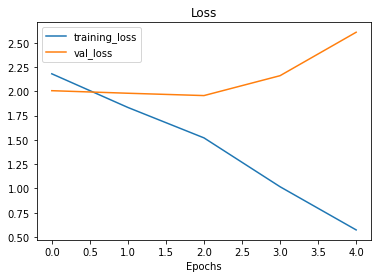

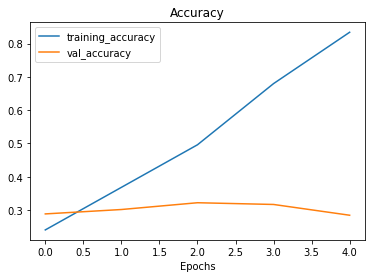

In [83]:
plot_loss_curves(history_10)

In [84]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [85]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 331s 1s/step - loss: 2.2490 - accuracy: 0.1860 - val_loss: 2.0496 - val_accuracy: 0.2560
Epoch 2/5
235/235 [==============================] - 333s 1s/step - loss: 2.0873 - accuracy: 0.2527 - val_loss: 1.9496 - val_accuracy: 0.3072
Epoch 3/5
235/235 [==============================] - 330s 1s/step - loss: 2.0474 - accuracy: 0.2800 - val_loss: 1.9027 - val_accuracy: 0.3444
Epoch 4/5
235/235 [==============================] - 330s 1s/step - loss: 1.9978 - accuracy: 0.2987 - val_loss: 1.8733 - val_accuracy: 0.3480
Epoch 5/5
235/235 [==============================] - 331s 1s/step - loss: 1.9754 - accuracy: 0.3145 - val_loss: 1.8426 - val_accuracy: 0.3436


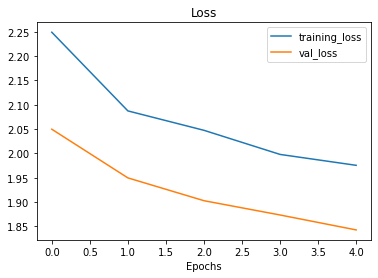

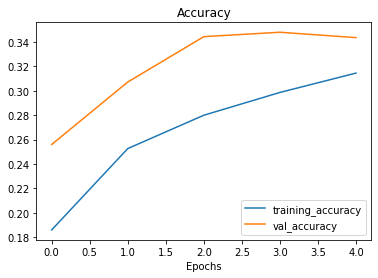

In [86]:
plot_loss_curves(history_11)

In [87]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [88]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 [==============================] - 0s 74ms/step


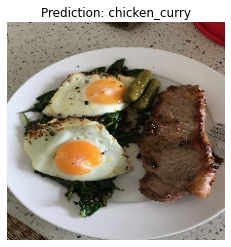

In [89]:
pred_and_plot(model=model_11, 
              filename="03-steak.jpeg", 
              class_names=class_names)

1/1 [==============================] - 0s 27ms/step


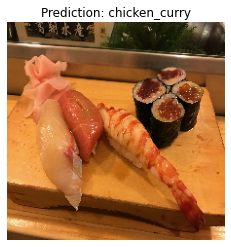

In [90]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 27ms/step


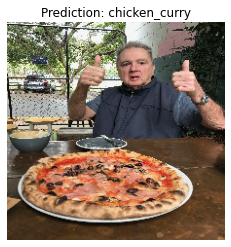

In [91]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 30ms/step


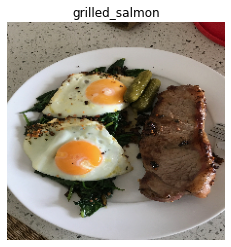

In [92]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [93]:
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred

1/1 [==============================] - 0s 28ms/step


array([[0.03660618, 0.05522279, 0.02653822, 0.35614958, 0.03943103,
        0.02541227, 0.01266351, 0.05278023, 0.3142561 , 0.08094005]],
      dtype=float32)

In [94]:
class_names[pred.argmax()]

'grilled_salmon'

In [95]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 28ms/step


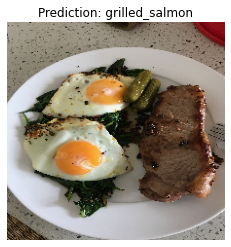

In [96]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

1/1 [==============================] - 0s 30ms/step


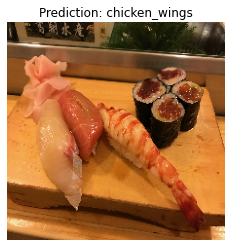

In [97]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 28ms/step


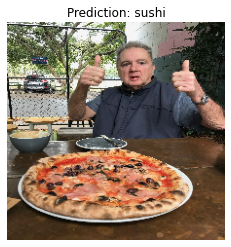

In [98]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 27ms/step


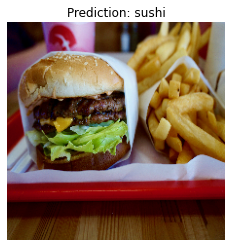

In [99]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

In [100]:
# Save a model
model_11.save("saved_trained_model")

In [101]:
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 36s 457ms/step - loss: 1.8426 - accuracy: 0.3436


[1.8426167964935303, 0.34360000491142273]

In [102]:
model_11.evaluate(test_data)

79/79 [==============================] - 34s 429ms/step - loss: 1.8426 - accuracy: 0.3436


[1.8426167964935303, 0.34360000491142273]